## Gravity anomalies

The gravitational force of a point mass $m$ (or a sphere) can be computed by

$$\vec g = G m \frac{\vec r}{r^3} = G V \Delta\varrho \frac{\vec r}{r^3}= \Delta\varrho G \frac43 \pi R^3 \frac{\vec r}{r^3} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("seaborn-notebook")
# %config InlineBackend.figure_format='svg' # Setting figure format for this notebook
# %matplotlib notebook

In [2]:
def gravitySphere(x, xS, dS, R=1, rho=1000, z=0):
    dx = x-xS
    dz = z+dS
    G = 6.6742e-11
    V = 4 / 3 * np.pi * R**3
    r = np.sqrt(dx**2 + dz**2)
    gz = dz * V * rho * G / r**3
    return gz * 1e5

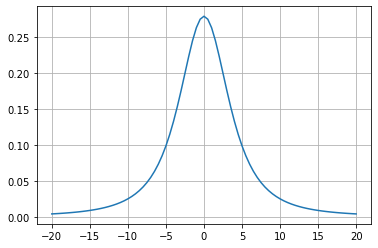

In [3]:
x = np.arange(-20, 20.1, .5)
g = gravitySphere(x, 0, 5, rho=2000, R=5)
plt.plot(x, g)
plt.grid()

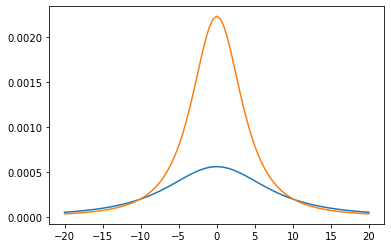

In [4]:
plt.plot(x, gravitySphere(x, 0, 10, rho=2000))
plt.plot(x, gravitySphere(x, 0, 5, rho=2000));

A double depth leads to a quarter of the anomaly. And a doubled half-width.

## 2D vs. 3D anomalies

The gravitational force of a cylinder with the density $\varrho$ can be computed by

$$\vec g = G A \Delta\varrho \frac{\vec r}{r^3}= \Delta\varrho G 2 \pi R^2 \frac{d}{r^2} $$

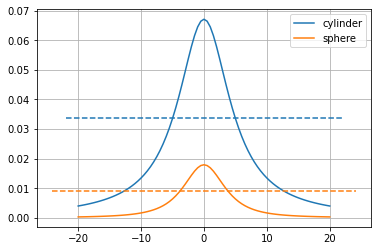

In [5]:
def gravityCylinder(x, xS, dS, R=1, rho=1000, z=0):
    dx = x-xS
    dz = z+dS
    G = 6.6742e-11
    A = np.pi * R**2
    r = np.sqrt(dx**2 + dz**2)
    gz = 2 * A * rho * G * dz / r**2
    return gz * 1e5

x = np.arange(-20, 20.1, .5)
R = 2
d = 5
gC = gravityCylinder(x, 0, d, rho=2000, R=R)
gS = gravitySphere(x, 0, d, rho=2000, R=R)
fig, ax = plt.subplots()
ax.plot(x, gC, label="cylinder")
ax.plot(x, gS, label="sphere")
ax.legend()
ax.grid()
ax.hlines(max(gC)/2, *ax.get_xlim(), color="C0", ls="dashed")
ax.hlines(max(gS)/2, *ax.get_xlim(), color="C1", ls="dashed")

## How to compute more complex models

In [6]:
import pygimli as pg
import pygimli.meshtools as mt

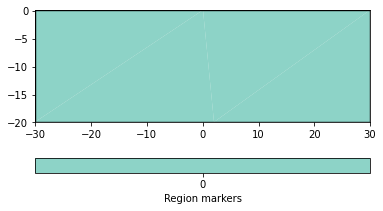

In [7]:
world = mt.createWorld(start=[-30, -20], end=[30, 0.1], marker=0)
pg.show(world);

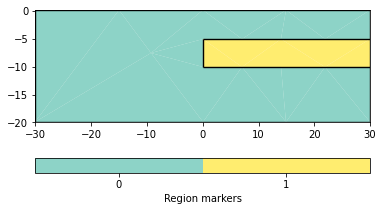

In [8]:
rect = mt.createRectangle(start=[0, -10], end=[30, -5], marker=1)
circle = mt.createCircle(pos=[-15, -7], radius=3, marker=2)
geo = world + rect # + circle
pg.show(geo);

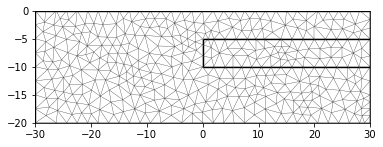

In [9]:
mesh = mt.createMesh(geo, quality=34, area=3)
pg.show(mesh);

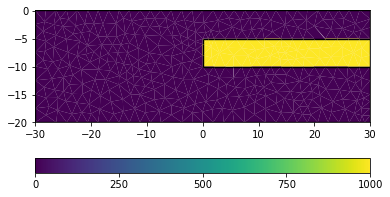

In [10]:
rhomap = [[0, 0.0], [1, 1000]]
pg.show(mesh, rhomap);

In [11]:
density = pg.solver.parseMapToCellArray(rhomap, mesh)
u = pg.solver.solve(mesh, a=1, f=density, bc={'Dirichlet': {-2:0, -1:0}})

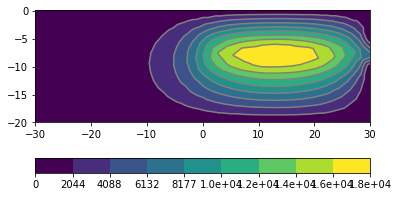

In [12]:
pg.show(mesh, u, nLevs=10);

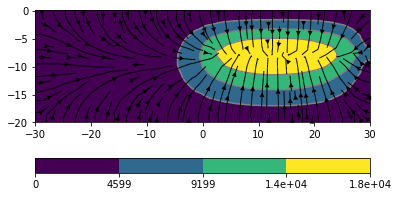

In [13]:
ax, cb = pg.show(mesh, u)
pg.viewer.mpl.drawStreams(ax, mesh, u, color='Black') # , coarseMesh=gridCoarse)

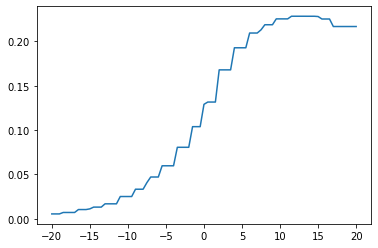

In [14]:
dudz = np.zeros_like(x)
for i, xi in enumerate(x):
    pnt = [xi, 0]
    c = mesh.findCell(pnt)
    g = c.grad(pnt, u)
    dudz[i] = -g[1] * 4. * np.pi * pg.physics.constants.GmGal

plt.plot(x, dudz);

In [15]:
from pygimli.physics.gravimetry import solveGravimetry

In [16]:
pnts = np.array([x, np.zeros(len(x))]).T
u = solveGravimetry(mesh, density, pnts)

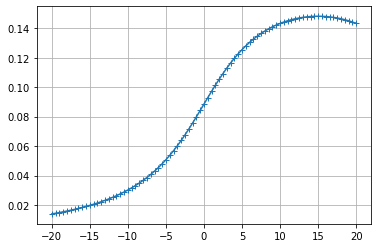

In [17]:
plt.figure()
plt.plot(x, u, "+-")
plt.grid();

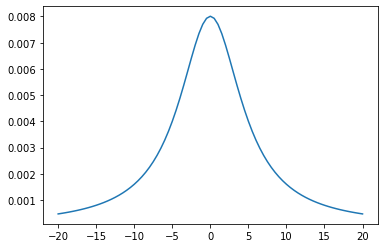

In [18]:
circle = mt.createCircle(pos=[0, -5])
u = solveGravimetry(circle, 1000, pnts)
plt.plot(x, u)